In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import requests
import json

In [2]:
# Read CSV file to DataFrame
vehicles_df = pd.read_csv("./CSVs/all_alpha_22.csv",encoding='utf-8')
vehicles_df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,NHNXV02.4KH3,small car,3,24,34,28,6,No,316
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,NHNXV02.4KH3,small car,3,24,34,28,6,No,316
2,ACURA MDX,3.5,6.0,SemiAuto-10,2WD,Gasoline,CA,L3ULEV70,California LEV-III ULEV70,NHNXT03.5CCC,small SUV,5,19,26,22,5,No,411
3,ACURA MDX,3.5,6.0,SemiAuto-10,2WD,Gasoline,FA,T3B70,Federal Tier 3 Bin 70,NHNXT03.5CCC,small SUV,5,19,26,22,5,No,411
4,ACURA MDX,3.5,6.0,SemiAuto-10,4WD,Gasoline,CA,L3ULEV70,California LEV-III ULEV70,NHNXT03.5CCC,small SUV,5,19,25,21,4,No,423


In [3]:
# Drop duplicates form Dataframe
vehicles_df.drop_duplicates()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,NHNXV02.4KH3,small car,3,24,34,28,6,No,316
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,NHNXV02.4KH3,small car,3,24,34,28,6,No,316
2,ACURA MDX,3.5,6.0,SemiAuto-10,2WD,Gasoline,CA,L3ULEV70,California LEV-III ULEV70,NHNXT03.5CCC,small SUV,5,19,26,22,5,No,411
3,ACURA MDX,3.5,6.0,SemiAuto-10,2WD,Gasoline,FA,T3B70,Federal Tier 3 Bin 70,NHNXT03.5CCC,small SUV,5,19,26,22,5,No,411
4,ACURA MDX,3.5,6.0,SemiAuto-10,4WD,Gasoline,CA,L3ULEV70,California LEV-III ULEV70,NHNXT03.5CCC,small SUV,5,19,25,21,4,No,423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,VOLVO XC90 T6,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVVXJ02.0S32,standard SUV,7,19,27,22,5,No,405
2623,VOLVO XC90 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVVXJ02.0P3S,standard SUV,7,26/58,28/53,27/55,9,Yes,197
2624,VOLVO XC90 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,NVVXJ02.0P3S,standard SUV,7,26/58,28/53,27/55,9,Yes,197
2625,VOLVO XC90 T8 Recharge ext. Range,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVVXJ02.0P3L,standard SUV,7,25/64,27/68,26/66,10,Yes,131


In [4]:
# Create a new DataFrame with desired columns
data = { 'Fuel': vehicles_df['Fuel'], 
        'Greenhouse_Score':vehicles_df['Greenhouse Gas Score'],'Comb_Co2':vehicles_df['Comb CO2'],
        'SmartWay':vehicles_df['SmartWay']}
smart_vehicles_df = pd.DataFrame(data)
smart_vehicles_df.head()

,Fuel,Greenhouse_Score,Comb_Co2,SmartWay
0,Gasoline,6,316,No
1,Gasoline,6,316,No
2,Gasoline,5,411,No
3,Gasoline,5,411,No
4,Gasoline,4,423,No


In [5]:
# Clean "Cobm_Co2" data
smart_vehicles_df['Comb_Co2'] = smart_vehicles_df['Comb_Co2'].str.split('/').str[0]

In [6]:
# Convert "Comb_Co2" data type to integer
smart_vehicles_df['Comb_Co2'] = smart_vehicles_df['Comb_Co2'].astype(str).astype(int)
smart_vehicles_df.dtypes

Fuel                object
Greenhouse_Score     int64
Comb_Co2             int32
SmartWay            object
dtype: object

In [7]:
# Using map function 
smart_vehicles_df['SmartWay'] = smart_vehicles_df['SmartWay'].replace('Elite','Yes')
smart_vehicles_df['SmartWay'] = smart_vehicles_df['SmartWay'].map({'Yes': 1, 'No': 0})
smart_vehicles_df

,Fuel,Greenhouse_Score,Comb_Co2,SmartWay
0,Gasoline,6,316,0
1,Gasoline,6,316,0
2,Gasoline,5,411,0
3,Gasoline,5,411,0
4,Gasoline,4,423,0
...,...,...,...,...
2622,Gasoline,5,405,0
2623,Gasoline/Electricity,9,197,1
2624,Gasoline/Electricity,9,197,1
2625,Gasoline/Electricity,10,131,1


In [8]:
# Encode "Fuel" column
from sklearn.preprocessing import OneHotEncoder

# one hot encoding to encode "Fuel" column
enc = OneHotEncoder(sparse=False)
fuel_onehot = enc.fit_transform(smart_vehicles_df[['Fuel']])

#to print the encoded features for train data
fuel_encoded_df = pd.DataFrame(fuel_onehot, columns=list(enc.categories_[0]))
fuel_encoded_df["Greenhouse_Score"] = smart_vehicles_df["Greenhouse_Score"]
fuel_encoded_df["Comb_CO2"] = smart_vehicles_df["Comb_Co2"]
fuel_encoded_df["SmartWay"] = smart_vehicles_df["SmartWay"]
fuel_encoded_df
print(fuel_encoded_df.dtypes)

Diesel                  float64
Electricity             float64
Ethanol/Gas             float64
Gasoline                float64
Gasoline/Electricity    float64
Hydrogen                float64
Greenhouse_Score          int64
Comb_CO2                  int32
SmartWay                  int64
dtype: object


In [10]:
fuel_encoded_df['Diesel'] = fuel_encoded_df['Diesel'].astype(float).astype(int)
fuel_encoded_df['Electricity'] = fuel_encoded_df['Electricity'].astype(float).astype(int)
fuel_encoded_df['Ethanol/Gas'] = fuel_encoded_df['Ethanol/Gas'].astype(float).astype(int)
fuel_encoded_df['Gasoline'] = fuel_encoded_df['Gasoline'].astype(float).astype(int)
fuel_encoded_df['Gasoline/Electricity'] = fuel_encoded_df['Gasoline/Electricity'].astype(float).astype(int)
fuel_encoded_df['Hydrogen'] = fuel_encoded_df['Hydrogen'].astype(float).astype(int)

In [11]:
# Get the values of X and y
X = fuel_encoded_df.iloc[:, :-1]
y = pd.DataFrame(fuel_encoded_df.iloc[:, -1]).values
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(2101, 8)
(526, 8)
(2101, 1)
(526, 1)


,Diesel,Electricity,Ethanol/Gas,Gasoline,Gasoline/Electricity,Hydrogen,Greenhouse_Score,Comb_CO2
1735,0,0,0,1,0,0,3,495
1732,0,0,0,1,0,0,3,560
1136,0,0,0,1,0,0,7,243
1663,0,0,0,1,0,0,5,385
440,0,0,0,1,0,0,2,573
...,...,...,...,...,...,...,...,...
1731,0,0,0,1,0,0,3,560
763,0,0,0,1,0,0,5,388
835,0,0,1,0,0,0,4,399
1653,0,0,0,1,0,0,8,225


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
y_train = scaler_Y.fit_transform(y_train)
X_test = scaler_X.transform(X_test)
y_test = scaler_Y.transform(y_test)
print(y_train.shape)
print(y_test.shape)

(2101, 1)
(526, 1)


In [14]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.928


C:\Users\Nishita\anaconda3\envs\mlene\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
y_pred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

92.77566539923954


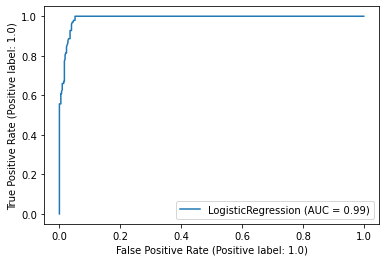

In [18]:
# Plot Receiver Operating Characteristic (ROC) curve
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(log_classifier, X_test, y_test)
plt.show()

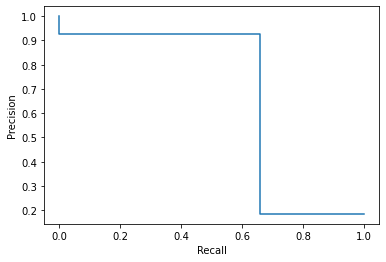

In [19]:
# Plot Precision Recall Curve for binary classifiers
 
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [20]:
from sklearn.metrics import classification_report
# Print Classification Report
print('\nClassification Report')
print(classification_report(y_test, y_pred))


Classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       429
         1.0       0.93      0.66      0.77        97

    accuracy                           0.93       526
   macro avg       0.93      0.82      0.86       526
weighted avg       0.93      0.93      0.92       526



In [21]:
# Saving model to disk
pickle.dump(log_classifier, open('model.pkl','wb'))

In [22]:
# Loading model to compare the results
model = pickle.load( open('model.pkl','rb'))

prediction = model.predict([[0,1,0,0,0,0,8,0]])
prediction

array([1.])

In [23]:
from sklearn.svm import SVC
# Create the SVM model
svm = SVC(kernel='linear')

In [24]:
# Train the model
svm.fit(X_train, y_train)
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.956


C:\Users\Nishita\anaconda3\envs\mlene\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# Random Forest Classification Model

from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

C:\Users\Nishita\anaconda3\envs\mlene\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


 Random forest predictive accuracy: 0.962
